# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).



<div class="alert alert-block alert-warning">
<b>Caution:</b> You will need to create the proper python virtual environment.  The environment specifications can be found in the requirements.txt file.
<br>
Using Anaconda is recommended.  To begin, execute the code below from your anaconda command prompt:<br>
<br>
$ conda env create -f environment.yaml
<br>
<br>
Then navigate to the directory for this project where you downloaded it on your PC and launch jupyter notebook from there.
</div>

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="C:\\Users\steph\Documents\deep-reinforcement-learning-master\p1_navigation\Banana_Windows_x86_64\Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [26]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         0.         1.         0.         0.04198606 0.
 0.         1.         0.         0.44862783 0.         1.
 0.         0.         0.12376072 0.         0.         1.
 0.         0.3686454  0.         1.         0.         0.
 0.17911078 1.         0.         0.         0.         0.35563549
 0.         1.         0.         0.         0.49020246 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [29]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = np.random.randint(action_size)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [ ]:
env.close()

<div class="alert alert-block alert-warning">
<b>Caution:</b> If you ran section 3 above, you will not be able to run the subsequent sections in this notebook.  To proceed, restart the kernel and run the notebook in order again being sure to skip and not run section 3.
</div>

### 4. Building our NN Model using Pytorch

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [62]:
class DeepQNetwork(nn.Module):
    
    def __init__(self, state_size, action_size, seed, fc1_units = 64, fc2_units = 64):
        
        super(DeepQNetwork, self).__init__()
        
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        
    def forward(self, state):
        
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

### 5. Building a Replay Buffer for our Agent

In [72]:
import random
from collections import namedtuple, deque

# Hyperparameters specific to prioritized replay

PRIO_REPLAY_ALPHA = 0.6
BETA_START = 0.4
BETA_FRAMES = 100000
t = 0

In [148]:
class ReplayBuffer:
    
    def __init__(self, action_size, buffer_size, batch_size, seed):
        
        self.action_size = action_size
        self.memory = deque(maxlen = buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names = ["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        
    def add(self, state, action, reward, next_state, done):
        
        # adding a new experience to memory
        
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
        
    def sample(self):
        
        # randomly sampling a batch of experiences from memory
        
        experiences = random.sample(self.memory, k = self.batch_size)
        
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones)
    
    def __len__(self):
        
        # return the current size of memory
        
        return len(self.memory)
    
class PrioReplayBuffer:
    
    def __init__(self, action_size, buffer_size, batch_size, seed, prob_alpha = PRIO_REPLAY_ALPHA):
        self.action_size = action_size
        self.memory = deque(maxlen = buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names = ["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        self.priorities = np.zeros((buffer_size,), dtype = np.float32)
        self.pos = 0
        self.prob_alpha = prob_alpha
        self.buffer_size = buffer_size
        
    def add(self, state, action, reward, next_state, done):
        
        max_prio = self.priorities.max() if self.memory else 1.0
        
        # adding a new experience to memory
        
        e = self.experience(state, action, reward, next_state, done)
        if len(self.memory) < self.buffer_size:
            self.memory.append(e)
        else:
            self.memory[self.pos] = e
        self.priorities[self.pos] = max_prio
        self.pos = (self.pos + 1) % self.buffer_size
    
    def sample(self, beta = 0.4):
        
        if len(self.memory) == self.buffer_size:
            prios = self.priorities
        else:
            prios = self.priorities[:self.pos]
        probs = prios ** self.prob_alpha
        
        probs /= probs.sum()
        indices = np.random.choice(len(self.memory), self.batch_size, p = probs)
        experiences = [self.memory[idx] for idx in indices]
        total = len(self.memory)
        weights = (total * probs[indices]) ** (-beta)
        weights /= weights.max()
        
        # randomly sampling a batch of experiences from memory
        
        # experiences = random.sample(self.memory, k = self.batch_size)
        
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones), indices, np.array(weights, dtype = np.float32)
    
    def __len__(self):
        
        # return the current size of memory
        
        return len(self.memory)    
    
    def update_priorities(self, batch_indices, batch_priorities):
        
        for idx, prio in zip(batch_indices, batch_priorities):
            self.priorities[idx] = prio

        
        

### 6. Initializing Hyperparameters

In [149]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target network parameters
LR = 5e-4               # learning rate
UPDATE_EVERY = 4        # how often to update the network

device = torch.device("cuda: 0" if torch.cuda.is_available() else "cpu")



### 7. Building the Agent

In [153]:
import matplotlib.pyplot as plt

class Agent():
    
    def __init__(self, state_size, action_size, seed, beta = BETA_START, prio = False):
        
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        
        # bringing in our NN from section 4 above
        
        self.qnetwork_local = DeepQNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = DeepQNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr = LR)
        
        # bring in replay buffer from section 5 above
        
        if prio == False:
            self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        else:
            self.memory = PrioReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        
        # initializing timestep
        
        self.t_step = 0
        
        self.beta = beta
        self.prio = prio
        
    def step(self, state, action, reward, next_state, done, beta, double = False):
        
        # save experiences in replay memory
        
        self.memory.add(state, action, reward, next_state, done)
            
        # learn every UPDATE_EVERY time steps
        
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            
            # if enough samples are available in memory, get random subset and learn
            
            if len(self.memory) > BATCH_SIZE:
                
                # from here on, the step function behaves differently depending on the values for the parameters of 
                    # double and prio.  If both double and prio are false, then learning occurs according to a
                    # regular Deep Q network with a randomly sampled replay buffer.  If double is set to true,
                    # learning occurs according to a Double Deep Q network and if prio is set to true, learning 
                    # occurs with a prioritized replay buffer
                
                if double == False and self.prio == False:
                    experiences = self.memory.sample()
                    self.learn(experiences, GAMMA)  # update value parameters as per normal Deep Q Network design
                    
                elif double == True and self.prio == False:
                    
                    # if 'double' is set to True, update value parameters using a Double Deep Q Network design
                    
                    experiences = self.memory.sample()
                    states, actions, rewards, next_states, dones = experiences
                    
                    next_state_actions = self.qnetwork_local(next_states).max(1)[1]
                    Q_targets_next = self.qnetwork_target(next_states).gather(1, next_state_actions.unsqueeze(-1)).detach()
                    
                    # the rest of the below is the same as it is in the 'learn' function
                    
                    Q_targets = rewards + (GAMMA * Q_targets_next * (1 - dones))
                    Q_expected = self.qnetwork_local(states).gather(1, actions)
                    loss = F.mse_loss(Q_expected, Q_targets)
                    self.optimizer.zero_grad()
                    loss.backward()
                    self.optimizer.step()
                    self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)
                    
                elif double == True and self.prio == True:
                    
                    # if 'double' is set to True, update value parameters using a Double Deep Q Network design
                    # if 'prio' is set to True, use prioritized replay buffer instead of regular replay buffer
                   
                    experiences, batch_indices, batch_weights = self.memory.sample(beta)
                    states, actions, rewards, next_states, dones = experiences
                    batch_weights_v = torch.tensor(batch_weights).to(device)
                    
                    next_state_actions = self.qnetwork_local(next_states).max(1)[1]
                    Q_targets_next = self.qnetwork_target(next_states).gather(1, next_state_actions.unsqueeze(-1)).detach()
                    
                    # the rest of the below is the same as it is in the 'learn' function
                    
                    Q_targets = rewards + (GAMMA * Q_targets_next * (1 - dones))
                    Q_expected = self.qnetwork_local(states).gather(1, actions)

                    losses_v = batch_weights_v * (Q_expected - Q_targets) ** 2
                    sample_prios_v = losses_v + 1e-5
                    losses_v = losses_v.mean()
                    sample_prios_v = sample_prios_v[0]
                    self.optimizer.zero_grad()
                    losses_v.backward()
                    self.optimizer.step()
                    self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)
                    self.memory.update_priorities(batch_indices, sample_prios_v.data.cpu().numpy())
                    
                    
                
    def act(self, state, eps = 0.):
        
        # returns actions for given state as per current epsilon-greedy policy
        
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()
        
        # epsilon-greedy action selection
        
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))
        
    def learn(self, experiences, gamma):
        
        # update value parameters using given batch of experience tuples
        
        states, actions, rewards, next_states, dones = experiences
        
        # get max predicted Q values for next states from target model
        
        Q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        
        # compute Q targets for current states
        
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        
        # get expected Q values from local model
        
        Q_expected = self.qnetwork_local(states).gather(1, actions)
        
        # compute loss
        
        loss = F.mse_loss(Q_expected, Q_targets)
        
        # minimize the loss
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        # update the target network
        
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)
        
    def soft_update(self, local_model, target_model, tau):
        
        # soft update model parameters
        
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            

### 8. Training the Agent

<div class="alert alert-block alert-warning">
<b>Caution:</b> Training takes a while.  If you wish to skip training to see the fully trained agent navigate the environment, skip to section 9.<br>
<br>
By default, the Agent will train using a Deep Q Network with a regular replay buffer.  If you wish to train under a Double Deep Q Network, please set the 'double' parameter to 'True' in the agent.step call.  If you wish to train using a prioritized replay buffer, set the 'prio' parameter to 'True' when initializing the agent.
</div>

Episode 100	Average Score: 0.77
Episode 200	Average Score: 4.18
Episode 300	Average Score: 7.54
Episode 400	Average Score: 10.10
Episode 500	Average Score: 12.60
Episode 600	Average Score: 14.06
Episode 700	Average Score: 15.18
Episode 800	Average Score: 15.66
Episode 900	Average Score: 16.37
Episode 1000	Average Score: 16.46
Episode 1100	Average Score: 16.24
Episode 1200	Average Score: 16.28
Episode 1300	Average Score: 16.30
Episode 1400	Average Score: 16.64
Episode 1500	Average Score: 16.24
Episode 1600	Average Score: 16.04
Episode 1700	Average Score: 16.23
Episode 1800	Average Score: 16.08
Episode 1900	Average Score: 15.65


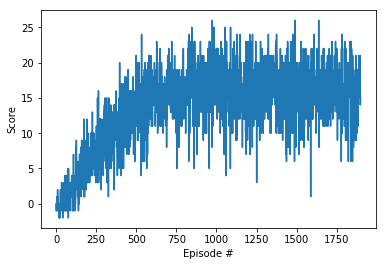

In [154]:
import torch.optim as optim

def dqn(n_episodes = 1900, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995):
    
    """
    Params
    
        n_episodes: maximum number of training episodes
        eps_start: starting value of epsilon for epsilon-greedy action selction
        eps_end: minimum value of epsilon
        esp_decay: multiplicative factor per episode for decreasing epsilon
    """
    
    
    scores = [] # list containing scores for each episode
    scores_window = deque(maxlen = 100) # last 100 scores
    eps = eps_start
    agent = Agent(state_size, action_size, seed = 0, prio = True) 
        # set 'prio' to True to change from regular replay buffer to prioritized replay buffer

    
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode = True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        beta = BETA_START
        i = 0
        while True:
            action = agent.act(state, eps)                 # select an action
            action = np.int(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done, beta, double = True)
                # set 'double' to True to change from a Deep Q Network to a Double Deep Q Network
            state = next_state
            score += reward
            i += 1
            beta = min(1.0, BETA_START + i * (1.0 - BETA_START) / BETA_FRAMES)
            if done:
                    break
        scores_window.append(score)                        # save the most recent score
        scores.append(score)                               # save the most recent score
        eps = max(eps_end, eps_decay*eps)                  # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end = "")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 13.0:
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    return scores

scores = dqn()

# plotting the scores

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

<div class="alert alert-block alert-info">
<b>Training Experimentation:</b> <br>
<br>


<b>Attempt 1:</b> Network: Deep-Q--, 2 layers [64, 64] w/no enhancement; Eps Decay-0.995; LR-.0005; GAMMA-0.99; Mean Result Last 100 Episodes- 15.62<br><br>
<b>Attempt 2:</b> Network: Deep-Q--, 2 layers [96, 96] w/no enhancement; Eps Decay-0.990; LR-.0005; GAMMA-0.99; Mean Result Last 100 Episodes- 14.83<br>
<b>-->Comment:</b> No improvement by adding additional nodes to hidden layers.<br><br>
<b>Attempt 3:</b> Network: Double-Deep-Q, 2 layers [64, 64]; Eps Decay-0.990; LR-.0005; GAMMA-0.99; Mean Result Last 100 Episodes- 15.90<br>
<b>-->Comment:</b> A slight improvement upon switching to a Double Deep-Q Network.<br><br>
<b>Attempt 4:</b> Network: Double-Q, 3 layers [64, 64, 64]; Eps Decay-0.990; LR-.0005; GAMMA-0.99; Mean Result Last 100 Episodes- 15.88<br>
<b>-->Comment:</b> No improvement by adding an additional layer.<br><br>
<b>Attempt 5:</b> Network: Double-Deep-Q, 2 layers [64, 64]; Eps Decay-0.995; LR-.0005; GAMMA-0.99; Mean Result Last 100 Episodes- 16.56 <br>
<b>-->Comment:</b> Reverting back to a decay rate of 0.995 with a Double Q Network results in another improvement.<br><br>
<b>Attempt 6:</b> Network: Double-Deep-Q; Prioritized Buffer; 2 layers [64, 64]; Eps Decay-0.995; LR-.0005; GAMMA-0.99; Mean Result Last 100 Episodes- 15.65 <br>
<b>-->Comment:</b> Using a prioritized replay buffer under the conditions of attempt #5 did not yield an improvement in results.<br><br>

</div>

<div class="alert alert-block alert-info">
<b>Conclusion:</b> <br>
<br>
The optimal agent for this environment appears to be one with a Double-Deep-Q network architecture consisting of 2 hidden layers of 64 nodes each.  An improvement on this agent was attempted by using a prioritized replay buffer but this did not yield the improved results seen in the original research.  For further improvements, the agent could incorporate a noisy network or rainbow network design.

</div>

### 9.  Watch the Trained Smart Agent

In [156]:
agent = Agent(state_size, action_size, seed = 0)
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

env_info = env.reset(train_mode = False)[brain_name]
state = env_info.vector_observations[0]

while True:
    action = agent.act(state, eps=0)                 # select an action
    action = np.int(action)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]
    # agent.step(state, action, reward, next_state, done)
    state = next_state

    if done:
            break